# VAR(p)
## Vector Autoregression
In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

However, there are some cases where variables affect each other. <a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice</a> describes a case where changes in personal consumption expenditures $C_t$ were forecast based on changes in personal disposable income $I_t$.
> However, in this case a bi-directional relationship may be more suitable: an increase in $I_t$ will lead to an increase in $C_t$ and vice versa.<br>An example of such a situation occurred in Australia during the Global Financial Crisis of 2008–2009. The Australian government issued stimulus packages that included cash payments in December 2008, just in time for Christmas spending. As a result, retailers reported strong sales and the economy was stimulated. Consequently, incomes increased.

Aside from investigating multivariate time series, vector autoregression is used for
* <a href='https://www.statsmodels.org/devel/vector_ar.html#impulse-response-analysis'>Impulse Response Analysis</a> which involves the response of one variable to a sudden but temporary change in another variable
* <a href='https://www.statsmodels.org/devel/vector_ar.html#forecast-error-variance-decomposition-fevd'>Forecast Error Variance Decomposition (FEVD)</a> where the proportion of the forecast variance of one variable is attributed to the effect of other variables
* <a href='https://www.statsmodels.org/devel/vector_ar.html#dynamic-vector-autoregressions'>Dynamic Vector Autoregressions</a> used for estimating a moving-window regression for the purposes of making forecasts throughout the data sample

### Formulation
We've seen that an autoregression AR(p) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

A $K$-dimensional VAR model of order $p$, denoted <strong>VAR(p)</strong>, considers each variable $y_K$ in the system.<br>

For example, The system of equations for a 2-dimensional VAR(1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br>

Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>

and the system of equations for a 3-dimensional VAR(2) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{13,1}y_{3,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{13,2}y_{3,t-2} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{23,1}y_{3,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{23,2}y_{3,t-2} + \varepsilon_{2,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{3,t} = c_3 + \phi_{31,1}y_{1,t-1} + \phi_{32,1}y_{2,t-1} + \phi_{33,1}y_{3,t-1} + \phi_{31,2}y_{1,t-2} + \phi_{32,2}y_{2,t-2} + \phi_{33,2}y_{3,t-2} + \varepsilon_{3,t}$<br><br>

The general steps involved in building a VAR model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate order <em>p</em>
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

Recall that to fit a SARIMAX model we passed one field of data as our <em>endog</em> variable, and another for <em>exog</em>. With VAR, both fields will be passed in as <em>endog</em>.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VAR.html'>vector_ar.var_model.VAR</a></strong><font color=black>(endog[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fit VAR(p) process and do lag order selection<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>vector_ar.var_model.VARResults</a></strong><font color=black>(endog, …[, …])</font>&nbsp;&nbsp;Estimate VAR(p) process with fixed number of lags<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.dynamic.DynamicVAR.html'>vector_ar.dynamic.DynamicVAR</a></strong><font color=black>(data[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Estimates time-varying vector autoregression (VAR(p)) using equation-by-equation least squares</tt>
   
<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/vector_ar.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Vector_autoregression'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregression</font>
</div>

### Perform standard imports and load dataset
For this analysis we'll also compare money to spending. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).<br>
Sources: https://fred.stlouisfed.org/series/M2SL https://fred.stlouisfed.org/series/PCE

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

### Inspect the data

In [4]:
df = df.join(sp)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [5]:
df = df.dropna()
df.shape

(252, 2)

### Plot the source data

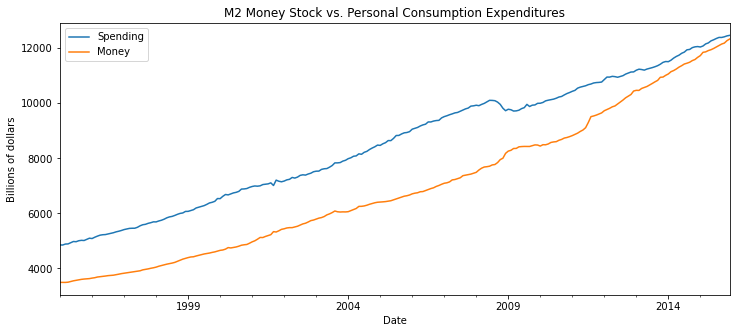

In [6]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Spending'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Money'].plot(legend=True);

## Test for stationarity, perform any necessary transformations

In [7]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
adf_test(df['Money'],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
adf_test(df['Spending'], title='Spending')

Augmented Dickey-Fuller Test: Spending
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### Neither variable is stationary, so we'll take a first order difference of the entire DataFrame and re-run the augmented Dickey-Fuller tests. It's advisable to save transformed values in a new DataFrame, as we'll need the original when we later invert the transormations and evaluate the model.

In [10]:
df_transformed = df.diff()

In [11]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Money'], title='MoneyFirstDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingFirstDiff')

Augmented Dickey-Fuller Test: MoneyFirstDiff
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: SpendingFirstDiff
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Since Money is not yet stationary, we'll apply second order differencing to both series so they retain the same number of observations. Do the transformation on both of the datasets (one row will be droping, easier to inverse together) 

In [17]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Money'], title='MoneySecondDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingSecondDiff')

Augmented Dickey-Fuller Test: MoneySecondDiff
ADF test statistic     -9.162049e+00
p-value                 2.517694e-15
# lags used             1.600000e+01
# observations          2.320000e+02
critical value (1%)    -3.458855e+00
critical value (5%)    -2.874080e+00
critical value (10%)   -2.573453e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SpendingSecondDiff
ADF test statistic     -7.872388e+00
p-value                 4.945371e-12
# lags used             1.500000e+01
# observations          2.330000e+02
critical value (1%)    -3.458731e+00
critical value (5%)    -2.874026e+00
critical value (10%)   -2.573424e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [18]:
df_transformed.head()

,Money,Spending
Date,,
1995-04-01,3.2,-64.8
1995-05-01,10.0,67.9
1995-06-01,-17.2,-36.6
1995-07-01,-5.9,-53.2
1995-08-01,9.3,94.1


In [19]:
len(df_transformed)

249

### Train/test split
It will be useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [20]:
#numbers of obs.
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [21]:
print(train.shape)
print(test.shape)

(237, 2)
(12, 2)


### VAR Model Order Selection (Grid search, AUTO ARIMA IS NOT WORKING FOR VAR)
We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [22]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  15.796135308776922
BIC:  15.884198829243674

Order = 2
AIC:  15.114477556763624
BIC:  15.261693961620821

Order = 3
AIC:  14.738769101218226
BIC:  14.945497714957577

Order = 4
AIC:  14.620770001897682
BIC:  14.887373830928508

Order = 5
AIC:  14.491207086701195
BIC:  14.818052871945413

Order = 6
AIC:  14.407601002813859
BIC:  14.795059273262199

Order = 7
AIC:  14.400431369101307
BIC:  14.84887649635216



In [26]:
model = VAR(train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  15.796135308776922
BIC:  15.884198829243674

Order = 2
AIC:  15.114477556763624
BIC:  15.261693961620821

Order = 3
AIC:  14.738769101218226
BIC:  14.945497714957577

Order = 4
AIC:  14.620770001897682
BIC:  14.887373830928508

Order = 5
AIC:  14.491207086701195
BIC:  14.818052871945413

Order = 6
AIC:  14.407601002813859
BIC:  14.795059273262199

Order = 7
AIC:  14.400431369101307
BIC:  14.84887649635216

Order = 8
AIC:  14.315332595867506
BIC:  14.82514284967032

Order = 9
AIC:  14.254519689253156
BIC:  14.826077294078896

Order = 10
AIC:  14.200965338195438
BIC:  14.834656530857195

Order = 11
AIC:  14.179882624285682
BIC:  14.876097712633138

Order = 12
AIC:  14.201894192206668
BIC:  14.96102761491876

Order = 13
AIC:  14.198123325497246
BIC:  15.020573712998013

Order = 14
AIC:  14.231118015997334
BIC:  15.117288252520593

Order = 15
AIC:  14.234802265620255
BIC:  15.185099552449449

Order = 16
AIC:  14.209771808741879
BIC:  15.224607728652158

Order = 17
AIC:  14.

The VAR(5) model seems to return the lowest combined scores.<br>
Just to verify that both variables are included in the model we can run <tt>.endog_names</tt>

In [27]:
model.endog_names

['Money', 'Spending']

## Fit the VAR(5) Model

In [29]:
results = model.fit(11)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Apr, 2022
Time:                     12:29:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.8761
Nobs:                     226.000    HQIC:                   14.4608
Log likelihood:          -2197.69    FPE:                1.44165e+06
AIC:                      14.1799    Det(Omega_mle):     1.18762e+06
--------------------------------------------------------------------
Results for equation Money
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.015975         1.964202           -0.008           0.994
L1.Money            -1.545475         0.071560          -21.597           0.000
L1.Spending         -0.110163         0.055817           -1.974 

## Predict the next 12 values
Unlike the VARMAX model we'll use in upcoming sections, the VAR <tt>.forecast()</tt> function requires that we pass in a lag order number of previous observations as well. Unfortunately this forecast tool doesn't provide a DateTime index - we'll have to do that manually.

In [30]:
lag_order = results.k_ar
lag_order

11

In [31]:
z = results.forecast(y=train.values[-lag_order:], steps=12)
z

array([[-5.62982431e+01,  5.54341082e+01],
       [ 1.45581912e+01, -6.07791435e+01],
       [ 7.73593338e-01,  1.66246118e+01],
       [ 2.52667418e-02,  1.64019632e+00],
       [ 6.98897840e+00,  1.72770371e+01],
       [-1.57325641e+01, -2.34913647e+01],
       [ 1.30943661e+01,  1.10533167e+01],
       [ 9.74581914e-01, -5.39739730e+00],
       [-1.15772648e+00, -8.65987231e+00],
       [ 4.19880492e+00,  1.87209008e+01],
       [-9.34492333e+00, -7.94262487e+00],
       [ 2.87565116e+00, -3.93081678e+00]])

In [32]:
test

,Money,Spending
Date,,
2015-01-01,-55.0,-8.8
2015-02-01,71.6,79.0
2015-03-01,-158.9,-12.9
2015-04-01,133.7,-79.9
2015-05-01,-46.7,79.2
2015-06-01,29.8,-72.9
2015-07-01,-7.3,41.0
2015-08-01,-7.4,-15.4
2015-09-01,6.2,-31.3


In [33]:
idx = pd.date_range('1/1/2015', periods=12, freq='MS')
df_forecast = pd.DataFrame(z, index=idx, columns=['Money2d','Spending2d'])
df_forecast

,Money2d,Spending2d
2015-01-01,-56.298243,55.434108
2015-02-01,14.558191,-60.779144
2015-03-01,0.773593,16.624612
2015-04-01,0.025267,1.640196
2015-05-01,6.988978,17.277037
2015-06-01,-15.732564,-23.491365
2015-07-01,13.094366,11.053317
2015-08-01,0.974582,-5.397397
2015-09-01,-1.157726,-8.659872
2015-10-01,4.198805,18.720901


## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [34]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
#BASICALLY ADD THE SUBTRACTED DIFFERENCE BACK(THE DIFFERENCE IS IN THE ORIGINAL SET)
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [35]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [36]:
df_forecast

,Money2d,Spending2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-56.298243,55.434108,22.301757,11692.401757,66.034108,12128.034108
2015-02-01,14.558191,-60.779144,36.859948,11729.261705,5.254965,12133.289073
2015-03-01,0.773593,16.624612,37.633541,11766.895246,21.879577,12155.168650
2015-04-01,0.025267,1.640196,37.658808,11804.554054,23.519773,12178.688422
2015-05-01,6.988978,17.277037,44.647787,11849.201841,40.796810,12219.485232
2015-06-01,-15.732564,-23.491365,28.915222,11878.117063,17.305445,12236.790678
2015-07-01,13.094366,11.053317,42.009588,11920.126652,28.358762,12265.149439
2015-08-01,0.974582,-5.397397,42.984170,11963.110822,22.961365,12288.110804
2015-09-01,-1.157726,-8.659872,41.826444,12004.937266,14.301492,12302.412296
2015-10-01,4.198805,18.720901,46.025249,12050.962515,33.022393,12335.434690


## Plot the results
The VARResults object offers a couple of quick plotting tools:

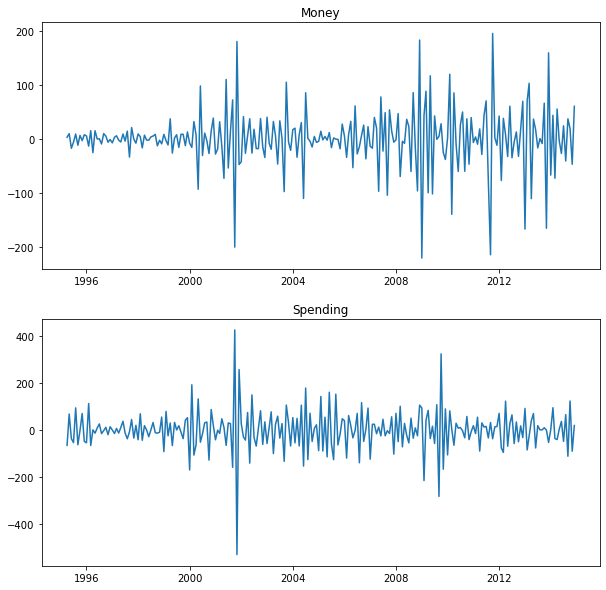

In [37]:
results.plot();

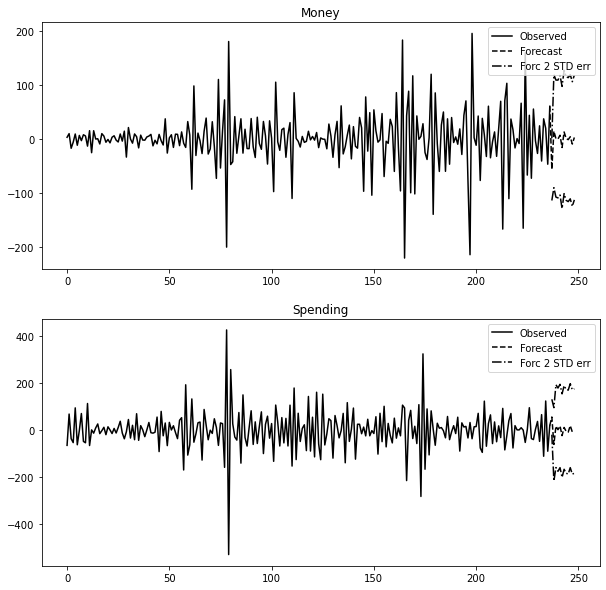

In [38]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

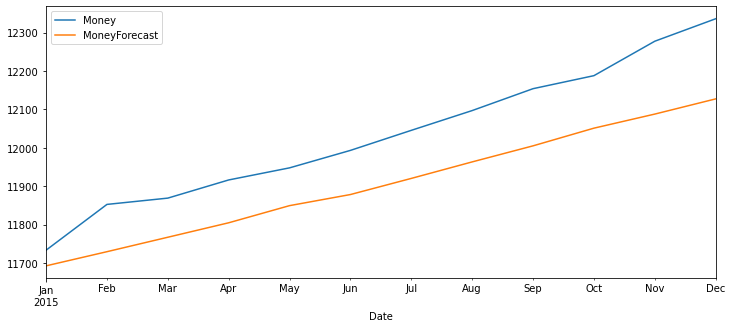

In [39]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

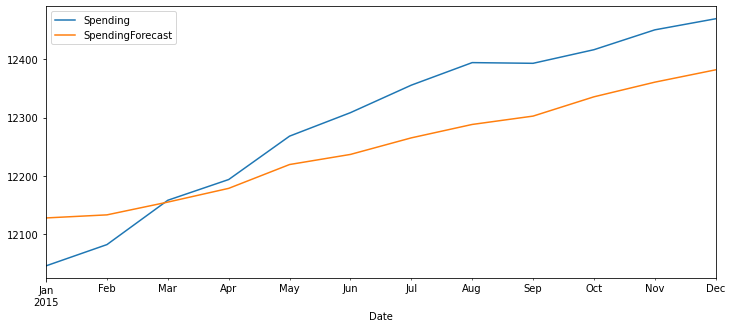

In [40]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [55]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR RMSE: {RMSE1:.3f}')

Money VAR RMSE: 134.326


In [56]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR RMSE: {RMSE2:.3f}')

Spending VAR RMSE: 74.576


## Let's compare these results to individual AR(5) models

In [57]:
from statsmodels.tsa.ar_model import AR,ARResults

### Money

In [59]:
modelM = AR(train['Money'])
AR5fit1 = modelM.fit(maxlag=11,method='mle')
print(f'Lag: {AR5fit1.k_ar}')
print(f'Coefficients:\n{AR5fit1.params}')

Lag: 11
Coefficients:
const       -0.068709
L1.Money    -1.480421
L2.Money    -1.736999
L3.Money    -1.691964
L4.Money    -1.738382
L5.Money    -1.614009
L6.Money    -1.414988
L7.Money    -1.222987
L8.Money    -1.039381
L9.Money    -0.814622
L10.Money   -0.489159
L11.Money   -0.193008
dtype: float64


In [60]:
start=len(train)
end=len(train)+len(test)-1
z1 = pd.DataFrame(AR5fit1.predict(start=start, end=end, dynamic=False),columns=['Money'])

In [61]:
z1

,Money
2015-01-01,-58.112979
2015-02-01,9.858773
2015-03-01,16.931109
2015-04-01,-11.774360
2015-05-01,3.576627
2015-06-01,-1.651500
2015-07-01,0.594750
2015-08-01,4.088560
2015-09-01,2.335878
2015-10-01,-2.197595


### Invert the Transformation, Evaluate the Forecast

In [62]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [63]:
z1

,Money,Money1d,MoneyForecast
2015-01-01,-58.112979,20.487021,11690.587021
2015-02-01,9.858773,30.345794,11720.932815
2015-03-01,16.931109,47.276902,11768.209717
2015-04-01,-11.774360,35.502542,11803.712259
2015-05-01,3.576627,39.079170,11842.791429
2015-06-01,-1.651500,37.427670,11880.219098
2015-07-01,0.594750,38.022420,11918.241518
2015-08-01,4.088560,42.110980,11960.352498
2015-09-01,2.335878,44.446858,12004.799355
2015-10-01,-2.197595,42.249263,12047.048618


In [65]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VAR RMSE: {RMSE1:.3f}')
print(f'Money  AR RMSE: {RMSE3:.3f}')

Money VAR RMSE: 134.326
Money  AR RMSE: 136.989


## Personal Spending

In [68]:
modelS = AR(train['Spending'])
AR5fit2 = modelS.fit(maxlag=11,method='mle')
print(f'Lag: {AR5fit2.k_ar}')
print(f'Coefficients:\n{AR5fit2.params}')

Lag: 11
Coefficients:
const          -0.307205
L1.Spending    -1.784762
L2.Spending    -2.204103
L3.Spending    -2.314956
L4.Spending    -2.225371
L5.Spending    -2.064735
L6.Spending    -1.804814
L7.Spending    -1.549288
L8.Spending    -1.284548
L9.Spending    -0.892681
L10.Spending   -0.483508
L11.Spending   -0.151611
dtype: float64


In [69]:
z2 = pd.DataFrame(AR5fit2.predict(start=start, end=end, dynamic=False),columns=['Spending'])
z2

,Spending
2015-01-01,53.944152
2015-02-01,-45.602969
2015-03-01,-5.150286
2015-04-01,16.710623
2015-05-01,-0.478561
2015-06-01,-13.829443
2015-07-01,13.949202
2015-08-01,-9.023470
2015-09-01,1.656356
2015-10-01,8.560639


### Invert the Transformation, Evaluate the Forecast

In [70]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [71]:
z2

,Spending,Spending1d,SpendingForecast
2015-01-01,53.944152,64.544152,12126.544152
2015-02-01,-45.602969,18.941183,12145.485335
2015-03-01,-5.150286,13.790897,12159.276231
2015-04-01,16.710623,30.501520,12189.777751
2015-05-01,-0.478561,30.022959,12219.800711
2015-06-01,-13.829443,16.193516,12235.994227
2015-07-01,13.949202,30.142719,12266.136946
2015-08-01,-9.023470,21.119249,12287.256194
2015-09-01,1.656356,22.775605,12310.031799
2015-10-01,8.560639,31.336244,12341.368043


In [72]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VAR RMSE: {RMSE2:.3f}')
print(f'Spending  AR RMSE: {RMSE4:.3f}')

Spending VAR RMSE: 74.576
Spending  AR RMSE: 72.338


CONCLUSION: It looks like the VAR(5) model did not do better than the individual AR(5) models. 